# Seaborn's Diamonds dataset will be analyzed and virtually represented.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
'''1.The data file for this project is available from the Seaborn website. To load this data 
into a DataFrame, run this code:'''

data = sns.load_dataset('diamonds')

In [3]:
'''2.Display the first five rows of data.'''

data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:>

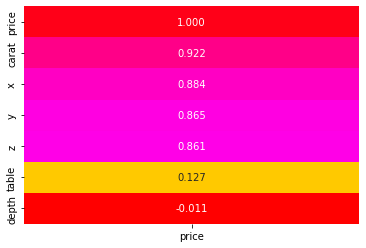

In [4]:
'''3.Use a condensed heatmap to identify correlations for the price column. Sort the results,
include annotations that format the values with three decimal places, and remove the color 
bar.'''

'''
I discovered some colors for cmap online.
Reference:https://matplotlib.org/stable/tutorials/colors/colormaps.html
plot_color_gradients('Cyclic', ['twilight', 'twilight_shifted', 'hsv'])'''

sns.heatmap(data=data.corr()[['price']].sort_values(
by='price', ascending=False), annot=True, cmap='hsv',
cbar=False, fmt=f'.3f')

In [5]:
'''4.Use the column with the strongest correlation to split the data into test and training 
datasets, where the test dataset consists of 30% of the total dataset. Be sure to specify a 
value for the random_state parameter.'''

x_train, x_test, y_train, y_test = train_test_split(
data[['carat']], data[['price']],
test_size=0.30, random_state=20)

In [6]:
'''5.Create a LinearRegression object, and then fit the training dataset to the model.'''

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [7]:
'''6.Score the model using the test dataset.'''

model.score(x_test, y_test)

0.8504107786474794

In [8]:
'''7.Predict the y values based on the x values in the test dataset, and store the results
in a variable.'''

variable = model.predict(x_test)
variable

array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871522],
       [-464.18539337],
       [5507.68827094]])

In [9]:
'''8.Put the predicted values in a DataFrame.'''

predicted = pd.DataFrame(variable,
columns=['Predicted_Price'])

In [10]:
'''9.Join the y_test and predicted data with the x_test data, save the joined data in a
new DataFrame, and then display the first five rows of data.'''

combined_new_DF = predicted.join([x_test.reset_index(drop=True),
y_test.reset_index(drop=True)])

combined_new_DF.head(5)

,Predicted_Price,carat,price
0,9540.641914,1.52,8674
1,1940.075433,0.54,1637
2,3180.984246,0.70,2657
3,2327.859437,0.59,1838
4,4421.893059,0.86,2980


In [11]:
combined_new_DF.tail(5)

,Predicted_Price,carat,price
16177,156.269013,0.31,914
16178,5585.245072,1.01,5932
16179,9618.198715,1.53,8971
16180,-464.185393,0.23,498
16181,5507.688271,1.00,6989


In [12]:
combined_new_DF['price'].tolist()

[8674,
 1637,
 2657,
 1838,
 2980,
 5778,
 7079,
 6118,
 625,
 3047,
 1129,
 4706,
 2641,
 2222,
 1214,
 680,
 3307,
 2268,
 675,
 1622,
 583,
 2401,
 1080,
 8959,
 846,
 1584,
 842,
 5345,
 1121,
 530,
 2415,
 2048,
 1332,
 3499,
 393,
 5335,
 4326,
 1815,
 2435,
 4661,
 502,
 789,
 491,
 9132,
 13899,
 3016,
 900,
 16319,
 1028,
 2386,
 666,
 17186,
 756,
 852,
 984,
 671,
 1337,
 3650,
 9912,
 1094,
 593,
 530,
 2376,
 2491,
 6887,
 13242,
 326,
 813,
 4160,
 2827,
 907,
 877,
 1670,
 1436,
 2478,
 2340,
 790,
 2622,
 9857,
 941,
 2473,
 473,
 2010,
 8001,
 1818,
 1094,
 1063,
 675,
 8887,
 4099,
 4087,
 1350,
 933,
 2870,
 933,
 7848,
 787,
 1316,
 1981,
 6849,
 5536,
 8709,
 1438,
 3257,
 921,
 1175,
 3911,
 449,
 6028,
 4666,
 2012,
 1158,
 10600,
 1218,
 1838,
 4465,
 911,
 851,
 5738,
 1798,
 3001,
 2671,
 1050,
 3127,
 1050,
 4489,
 6300,
 1043,
 478,
 1901,
 1841,
 4830,
 12979,
 2818,
 906,
 1200,
 10055,
 596,
 2270,
 906,
 14304,
 2473,
 7433,
 4849,
 633,
 11113,
 14745,


In [13]:
combined_new_DF['Predicted_Price'].tolist()

[9540.641914379816,
 1940.0754325209991,
 3180.984245885703,
 2327.8594366974685,
 4421.8930592504075,
 8144.619499344522,
 7058.824287650405,
 8067.062698509228,
 156.26901330923556,
 3413.6546483915854,
 1086.9506233327638,
 4809.677063426879,
 4034.109055073938,
 2870.7570425445274,
 1629.8482291798223,
 156.26901330923556,
 4732.120262591584,
 3180.984245885703,
 78.71221247394124,
 2095.189034191587,
 156.26901330923556,
 2250.3026358621746,
 854.2802208268822,
 6283.256279297466,
 78.71221247394124,
 2017.632233356293,
 854.2802208268822,
 5585.245071779818,
 1784.9618308504105,
 -464.18539337311677,
 3180.984245885703,
 3180.984245885703,
 1629.8482291798223,
 5585.245071779818,
 233.82581414452943,
 6360.813080132759,
 4887.233864262173,
 2017.632233356293,
 3336.0978475562906,
 6515.926681803347,
 156.26901330923556,
 544.0530174857054,
 78.71221247394124,
 9307.971511873933,
 9385.528312709226,
 4732.120262591584,
 233.82581414452943,
 13573.595557815106,
 156.26901330923556,

In [14]:
combined_new_DF.rename(columns={'price':'Actual_Price','carat':'Carat'},inplace=True)
combined_new_DF.head(5)

,Predicted_Price,Carat,Actual_Price
0,9540.641914,1.52,8674
1,1940.075433,0.54,1637
2,3180.984246,0.70,2657
3,2327.859437,0.59,1838
4,4421.893059,0.86,2980


In [15]:
combined_new_DF

,Predicted_Price,Carat,Actual_Price
0,9540.641914,1.52,8674
1,1940.075433,0.54,1637
2,3180.984246,0.70,2657
3,2327.859437,0.59,1838
4,4421.893059,0.86,2980
...,...,...,...
16177,156.269013,0.31,914
16178,5585.245072,1.01,5932
16179,9618.198715,1.53,8971
16180,-464.185393,0.23,498


In [16]:
'''10.Melt the actual and predicted price columns together, assigning appropriate values to 
the variable and value names.'''

melted = pd.melt(combined_new_DF, id_vars=['Carat'],
value_vars=['Actual_Price','Predicted_Price'],
var_name='Price_Type',
value_name='Price_Value')

melted

,Carat,Price_Type,Price_Value
0,1.52,Actual_Price,8674.000000
1,0.54,Actual_Price,1637.000000
2,0.70,Actual_Price,2657.000000
3,0.59,Actual_Price,1838.000000
4,0.86,Actual_Price,2980.000000
...,...,...,...
32359,0.31,Predicted_Price,156.269013
32360,1.01,Predicted_Price,5585.245072
32361,1.53,Predicted_Price,9618.198715
32362,0.23,Predicted_Price,-464.185393


<AxesSubplot:xlabel='Carat', ylabel='Price_Value'>

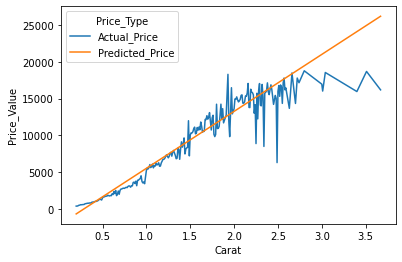

In [17]:
'''11.Use a Seaborn line plot without a confidence interval to plot the predicted data.'''

sns.lineplot(data=melted, x='Carat', y='Price_Value', hue='Price_Type', ci=None)

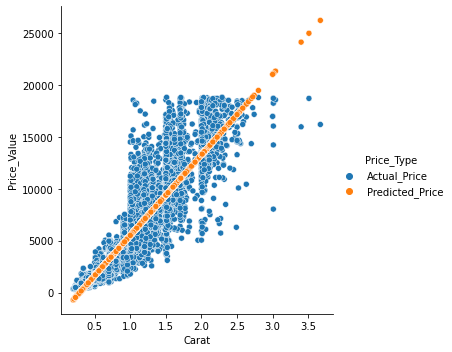

In [18]:
sns.relplot(data=melted,kind='scatter', x='Carat', y='Price_Value', hue='Price_Type', ci=None)

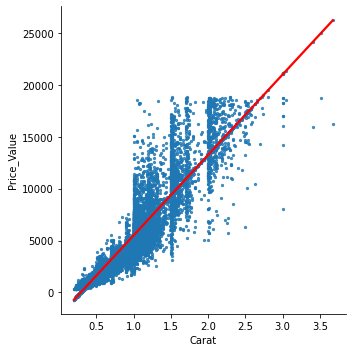

In [19]:
sns.lmplot(data=melted, x='Carat', y='Price_Value', ci=None,
scatter_kws={'s':5}, line_kws={'color':'red'})

<AxesSubplot:xlabel='Carat', ylabel='Price_Value'>

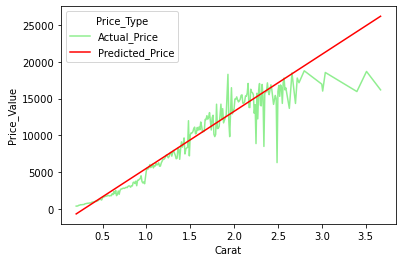

In [20]:
colors = ['lightGreen','red']
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=melted, x='Carat', y='Price_Value', hue='Price_Type', ci=None)